In [ ]:
import pandas as pd
import re 
import nltk

## Loading data

In [ ]:
!wget https://raw.githubusercontent.com/KubaKonieczny/Machine-Learning-Techniques/main/Task%20NLP/products.csv

--2023-01-17 10:42:56--  https://raw.githubusercontent.com/KubaKonieczny/Machine-Learning-Techniques/main/Task%20NLP/products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41007317 (39M) [text/plain]
Saving to: ‘products.csv’

products.csv        100%[===================>]  39.11M   111MB/s    in 0.4s    

2023-01-17 10:42:59 (111 MB/s) - ‘products.csv’ saved [41007317/41007317]



In [ ]:
with open('products.csv') as f:
  for line in f.readlines():
    line =  line.replace(";","")
    if "\"" in line:
      n = open("part_1.csv", "a")
      n.write(line)
      n.close()
    else:
        n = open("part_2.csv", "a")
        n.write(line)
        n.close()

In [ ]:
df = pd.read_csv('part_2.csv', )
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
2,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
3,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
4,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
...,...,...,...,...,...,...,...,...,...,...
9609,50808,B008C2JCUW,A11VDNK8V7XIW8,Latifat Oginni,2,4,3,1233878400,Okay product,I didn't really see a difference in my hair wi...
9610,50816,B003E75Y5C,A3O1FEQI64S2K0,John Mullen,0,0,5,1348358400,Great food- high price,The price of this food went up 3.50 $ on Amazo...
9611,50818,B003E75Y5C,AAJ13SJO99H9K,DR2,0,0,5,1342137600,LOVE LOVE LOVE this food.,My Persian loves this food and it's not all ov...
9612,50819,B003E75Y5C,A5DHS3EQLCTXQ,Grannaof4,0,0,5,1342051200,Cats love it!,My persian Gavin plus the non-Persian Ellie bo...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9614 entries, 0 to 9613
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      9614 non-null   int64 
 1   ProductId               9614 non-null   object
 2   UserId                  9614 non-null   object
 3   ProfileName             9612 non-null   object
 4   HelpfulnessNumerator    9614 non-null   int64 
 5   HelpfulnessDenominator  9614 non-null   int64 
 6   Score                   9614 non-null   int64 
 7   Time                    9614 non-null   int64 
 8   Summary                 9614 non-null   object
 9   Text                    9614 non-null   object
dtypes: int64(5), object(5)
memory usage: 751.2+ KB


In [ ]:
df.UserId.unique()

array(['A3SGXH7AUHU8GW', 'A395BORC6FGVXV', 'A1MZYO9TZK0BBI', ...,
       'AAJ13SJO99H9K', 'A5DHS3EQLCTXQ', 'A1YMJXUONTRBEZ'], dtype=object)

## Preprocessing

### Removing capital letters 

In [ ]:
df.Summary = df.Summary.apply(lambda x: str(x).lower())
df.Text = df.Text.apply(lambda x: str(x).lower())

### Removing useless characters

In [ ]:
df.Summary = df.Summary.apply(lambda x: x.translate({ord(i): None for i in '!"_$%&/()=_ˆ*¡@'}))
df.Text = df.Text.apply(lambda x: x.translate({ord(i): None for i in '!"_$%&/()=_ˆ*¡@'}))

### Removing duplicated words

In [ ]:
def remove_duplicated_words(text):
  n=""
  while text!=n:
    n = text
    text =  re.sub(r'\b(\w+) \1\b', r'\1', text, flags=re.IGNORECASE)

  return text

In [ ]:
df.Summary = df.Summary.apply(lambda x: remove_duplicated_words(x))
df.Text = df.Text.apply(lambda x: remove_duplicated_words(x))

### Removing duplicated characters

In [ ]:
def remove_duplicated_characters(text):
  regexp = re.compile(r'(\w*)(\w)\2(\w*)')
  repl = r'\1\2\3'

  repeated = regexp.sub(repl, text)
  if repeated != text: 
      return remove_duplicated_characters(repeated) 
  else:
      return repeated 

In [ ]:
df.Summary = df.Summary.apply(lambda x: remove_duplicated_characters(x))
df.Text = df.Text.apply(lambda x: remove_duplicated_characters(x))

### Removing contractions

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.5 MB/s eta 0:00:00


In [ ]:
import contractions

df.Summary = df.Summary.apply(lambda x: contractions.fix(x))
df.Text = df.Text.apply(lambda x: contractions.fix(x))

### Correct wrong words

In [ ]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


It takes a long time to execute

In [ ]:
# df.Summary = df.Summary.apply(lambda x: TextBlob(x).correct())
# df.Text = df.Text.apply(lambda x: TextBlob(x).correct())

### Removing stopwords

It also takes too long 

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def rem_stopwords(sentence):
  text_tokens = word_tokenize(sentence)
  stop_words = stopwords.words()
  words = [x for x in sentence if x not in stop_words]
  return " ".join(words)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#df.Summary = df.Summary.apply(lambda x: rem_stopwords(x))
#df.Text = df.Text.apply(lambda x: rem_stopwords(x))

### Lemmatizing

In [ ]:
import nltk
nltk.download('popular')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
df.Summary = df.Summary.apply(lambda x: " ".join([lemmatizer.lemmatize(t, pos = 'v') for t in x.split()]))
df.Text = df.Text.apply(lambda x: " ".join([lemmatizer.lemmatize(t, pos = 'v') for t in x.split()]))

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,god quality dog fod,i have buy several of the vitality can dog fod...
1,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you be loking for the secret ingredient in ...
2,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,yay barley,right now i be mostly just sprout this so my c...
3,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,healthy dog fod,this be a very healthy dog fod. god for their ...
4,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,por taste,i love eat them and they be god for watch tv a...
...,...,...,...,...,...,...,...,...,...,...
9609,50808,B008C2JCUW,A11VDNK8V7XIW8,Latifat Oginni,2,4,3,1233878400,okay product,i do not realy se a diference in my hair with ...
9610,50816,B003E75Y5C,A3O1FEQI64S2K0,John Mullen,0,0,5,1348358400,great fod- high price,the price of this fod go up 3.50 on amazon ove...
9611,50818,B003E75Y5C,AAJ13SJO99H9K,DR2,0,0,5,1342137600,love this fod.,my persian love this fod and it be not al over...
9612,50819,B003E75Y5C,A5DHS3EQLCTXQ,Grannaof4,0,0,5,1342051200,cat love it,my persian gavin plus the non-persian elie bot...


## Vectorization

### TFIDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer

In [ ]:
ct = make_column_transformer(
    (TfidfVectorizer(min_df=2, stop_words='english'), 'Summary'), 
    (TfidfVectorizer(min_df=10, stop_words='english'), 'Text'))

In [ ]:
tfidf = pd.DataFrame(ct.fit_transform(df).todense(), columns=ct.get_feature_names_out())
tfidf 

,tfidfvectorizer-1__02,tfidfvectorizer-1__09,tfidfvectorizer-1__10,tfidfvectorizer-1__12,tfidfvectorizer-1__13,tfidfvectorizer-1__1519,tfidfvectorizer-1__17,tfidfvectorizer-1__20,tfidfvectorizer-1__2nd,tfidfvectorizer-1__30,...,tfidfvectorizer-2__young,tfidfvectorizer-2__younger,tfidfvectorizer-2__yr,tfidfvectorizer-2__yuban,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yum,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zero,tfidfvectorizer-2__zico,tfidfvectorizer-2__zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### TDIF + N-grams

In [ ]:
ct_ngram = make_column_transformer(
    (TfidfVectorizer(min_df=2, ngram_range=(1,3), stop_words='english'), 'Summary'), 
    (TfidfVectorizer(min_df=10, ngram_range=(1,3), stop_words='english'), 'Text'))



In [ ]:
ngram = pd.DataFrame(ct_ngram.fit_transform(df).todense(), columns=ct_ngram.get_feature_names_out())
ngram 

,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12,tfidfvectorizer-1__10,tfidfvectorizer-1__10 calorie,tfidfvectorizer-1__10 calories,tfidfvectorizer-1__10 flavor,tfidfvectorizer-1__10 flavor pack,...,tfidfvectorizer-2__younger,tfidfvectorizer-2__yr,tfidfvectorizer-2__yr old,tfidfvectorizer-2__yuban,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yum,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zero,tfidfvectorizer-2__zico,tfidfvectorizer-2__zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### TFIDF + N-grams + POS tagging

In [ ]:
def create_pos_tagged_text(text):
  pos_tagged =  nltk.pos_tag(nltk.word_tokenize(text))
  return " ".join(tag[0]+"_"+tag[1] for tag in pos_tagged)

In [ ]:
df['Text'] = df['Text'].apply(lambda x: create_pos_tagged_text(x))
df['Summary'] = df['Summary'].apply(lambda x: create_pos_tagged_text(x))


In [ ]:
ct_ngram = make_column_transformer(
    (TfidfVectorizer(min_df=2, ngram_range=(1,3), stop_words='english'), 'Summary'), 
    (TfidfVectorizer(min_df=10, ngram_range=(1,3), stop_words='english'), 'Text'))

In [ ]:
pos = pd.DataFrame(ct_ngram.fit_transform(df).todense(), columns=ct_ngram.get_feature_names_out())
pos 

,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__0_cd,tfidfvectorizer-1__10_cd,tfidfvectorizer-1__10_cd calories_nns,tfidfvectorizer-1__10_cd flavor_nn,tfidfvectorizer-1__10_cd flavor_nn pack_nn,...,tfidfvectorizer-2__your_prp money_nn,tfidfvectorizer-2__your_prp mouth_nn,tfidfvectorizer-2__your_prp own_jj,tfidfvectorizer-2__yourself_prp,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__yumy_rb,tfidfvectorizer-2__zico_nn,tfidfvectorizer-2__zip_nn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### TFIDF + N-grams + POS tagging + other features

In [ ]:
ct_ngram = make_column_transformer(
    (TfidfVectorizer(min_df=2, ngram_range=(1,3), stop_words='english'), 'Summary'), 
    (TfidfVectorizer(min_df=10, ngram_range=(1,3), stop_words='english'), 'Text'))

In [ ]:
other = pd.DataFrame(ct_ngram.fit_transform(df).todense(), columns=ct_ngram.get_feature_names_out())
other 

,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__0_cd,tfidfvectorizer-1__10_cd,tfidfvectorizer-1__10_cd calories_nns,tfidfvectorizer-1__10_cd flavor_nn,tfidfvectorizer-1__10_cd flavor_nn pack_nn,...,tfidfvectorizer-2__your_prp money_nn,tfidfvectorizer-2__your_prp mouth_nn,tfidfvectorizer-2__your_prp own_jj,tfidfvectorizer-2__yourself_prp,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__yumy_rb,tfidfvectorizer-2__zico_nn,tfidfvectorizer-2__zip_nn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### Words' number

In [ ]:
def words_number(text):
  words_in_text = text.split(" ")
  
  return len(words_in_text)

In [ ]:
summary_words = []

for row in df['Summary']:
  summary_words.append(words_number(row))

print(summary_words)

[4, 2, 2, 3, 2, 2, 3, 2, 1, 5, 1, 4, 1, 2, 2, 3, 4, 2, 2, 3, 1, 4, 5, 11, 2, 4, 3, 2, 2, 2, 6, 4, 2, 2, 3, 2, 2, 1, 2, 3, 15, 2, 4, 4, 4, 1, 1, 4, 6, 3, 4, 4, 2, 8, 1, 7, 2, 5, 4, 4, 1, 1, 4, 4, 3, 4, 2, 2, 2, 2, 5, 3, 3, 7, 2, 3, 2, 4, 8, 3, 1, 7, 4, 3, 5, 1, 3, 8, 4, 20, 2, 4, 1, 3, 1, 3, 2, 1, 3, 1, 12, 2, 3, 1, 2, 1, 6, 6, 4, 4, 2, 4, 7, 9, 5, 2, 2, 6, 9, 1, 6, 5, 4, 2, 3, 4, 4, 3, 1, 1, 4, 3, 2, 3, 2, 5, 2, 2, 1, 2, 2, 1, 10, 4, 1, 1, 2, 5, 16, 6, 1, 4, 2, 1, 3, 3, 6, 3, 5, 2, 2, 2, 3, 5, 5, 1, 8, 4, 9, 2, 2, 3, 4, 5, 3, 3, 8, 3, 3, 5, 2, 4, 3, 4, 3, 2, 2, 5, 5, 4, 2, 1, 2, 4, 2, 4, 3, 1, 3, 3, 12, 6, 1, 8, 3, 2, 2, 6, 3, 1, 2, 2, 10, 3, 2, 2, 2, 2, 2, 2, 3, 7, 3, 4, 9, 5, 2, 7, 5, 3, 6, 2, 5, 3, 3, 5, 5, 1, 2, 4, 6, 2, 3, 2, 3, 5, 2, 5, 2, 7, 2, 2, 5, 4, 2, 4, 1, 4, 5, 5, 3, 1, 3, 2, 2, 1, 4, 2, 2, 2, 6, 2, 1, 4, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 5, 1, 2, 1, 6, 6, 3, 2, 7, 6, 5, 5, 5, 1, 5, 2, 2, 7, 2, 2, 3, 2, 2, 15, 9, 3, 5, 1, 1, 3, 1, 2, 1, 5, 1, 1, 4, 1, 4, 2, 2, 3, 3, 2, 1, 1, 

In [ ]:
text_words = []

for row in df['Text']:
  text_words.append(words_number(row))

print(text_words)

[51, 44, 29, 29, 44, 28, 31, 31, 21, 42, 36, 53, 52, 41, 37, 17, 36, 18, 16, 23, 40, 40, 138, 40, 27, 66, 37, 57, 60, 26, 100, 50, 22, 32, 36, 44, 28, 63, 37, 47, 139, 57, 107, 63, 39, 26, 24, 45, 36, 27, 24, 25, 53, 28, 36, 22, 42, 144, 24, 25, 22, 33, 50, 29, 14, 32, 71, 40, 34, 28, 61, 27, 21, 27, 22, 34, 54, 39, 38, 37, 46, 48, 38, 43, 59, 19, 82, 53, 33, 20, 44, 29, 23, 28, 55, 36, 68, 25, 28, 113, 48, 26, 22, 21, 39, 51, 63, 52, 111, 39, 37, 35, 37, 85, 98, 33, 25, 57, 29, 29, 41, 26, 30, 17, 25, 49, 74, 22, 20, 37, 55, 67, 55, 25, 37, 88, 21, 50, 93, 25, 33, 31, 27, 44, 24, 26, 42, 74, 63, 35, 24, 44, 25, 30, 17, 28, 90, 95, 29, 67, 35, 30, 43, 31, 86, 37, 36, 130, 76, 27, 25, 75, 25, 51, 29, 61, 41, 46, 53, 101, 25, 51, 20, 57, 42, 38, 34, 28, 30, 42, 28, 26, 30, 39, 22, 43, 23, 30, 41, 49, 62, 25, 23, 26, 59, 24, 27, 23, 41, 45, 30, 65, 37, 32, 52, 26, 64, 42, 26, 27, 77, 63, 26, 36, 18, 21, 28, 31, 27, 56, 30, 35, 66, 54, 48, 18, 43, 23, 43, 68, 36, 36, 31, 26, 80, 27, 75, 28

In [ ]:
other['s_words_count'] = summary_words
other['t_words_count'] = text_words

#### Sentences' number

In [ ]:
def sentences_number(text):
  s_num = text.count(".")

  return s_num if s_num != 0 else 1

In [ ]:
summary_sentences = []

for row in df['Summary']:
  summary_sentences.append(sentences_number(row))

print(summary_sentences)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
text_sentences = []

for row in df['Text']:
  text_sentences.append(sentences_number(row))

print(text_sentences)

[6, 6, 4, 8, 4, 6, 4, 4, 4, 7, 4, 4, 8, 8, 4, 1, 6, 1, 2, 8, 4, 9, 14, 4, 4, 8, 8, 10, 11, 6, 16, 8, 1, 8, 4, 6, 4, 4, 6, 4, 14, 7, 7, 9, 6, 6, 6, 4, 8, 6, 6, 2, 6, 2, 5, 2, 6, 22, 4, 6, 2, 6, 13, 3, 2, 7, 6, 6, 4, 8, 5, 6, 4, 6, 4, 4, 4, 4, 4, 4, 2, 5, 6, 6, 6, 2, 5, 2, 4, 1, 8, 6, 1, 6, 6, 2, 6, 6, 5, 17, 7, 6, 1, 2, 10, 4, 8, 9, 13, 6, 8, 1, 4, 5, 8, 8, 4, 7, 2, 4, 10, 4, 6, 4, 4, 7, 10, 4, 1, 4, 2, 14, 8, 2, 6, 15, 2, 4, 9, 2, 4, 1, 6, 8, 4, 2, 6, 8, 6, 6, 1, 4, 6, 4, 2, 6, 17, 17, 4, 4, 6, 8, 6, 6, 8, 4, 6, 18, 7, 6, 4, 10, 3, 6, 5, 8, 4, 3, 6, 11, 1, 8, 2, 6, 6, 8, 6, 4, 2, 8, 8, 8, 8, 8, 2, 8, 5, 8, 8, 10, 8, 1, 2, 4, 7, 1, 8, 4, 10, 6, 6, 6, 6, 6, 5, 1, 6, 7, 6, 4, 13, 2, 2, 3, 3, 4, 8, 5, 6, 7, 3, 4, 6, 12, 6, 4, 2, 4, 5, 8, 6, 4, 4, 6, 11, 6, 10, 1, 4, 11, 3, 14, 4, 6, 3, 4, 2, 8, 6, 4, 6, 7, 2, 2, 6, 4, 3, 6, 2, 7, 8, 5, 10, 12, 4, 2, 6, 1, 6, 5, 4, 8, 4, 9, 3, 16, 8, 6, 21, 10, 4, 4, 10, 13, 6, 13, 7, 4, 1, 10, 4, 6, 10, 2, 4, 4, 2, 13, 6, 9, 8, 4, 6, 6, 8, 6, 4, 8, 10, 8, 

In [ ]:
other['s_sentences_count'] = summary_sentences
other['t_sentences_count'] = text_sentences

In [ ]:
other

,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__0_cd,tfidfvectorizer-1__10_cd,tfidfvectorizer-1__10_cd calories_nns,tfidfvectorizer-1__10_cd flavor_nn,tfidfvectorizer-1__10_cd flavor_nn pack_nn,...,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__yumy_rb,tfidfvectorizer-2__zico_nn,tfidfvectorizer-2__zip_nn,s_words_count,t_words_count,s_sentences_count,t_sentences_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,4,51,1,6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2,44,1,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2,29,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3,29,1,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.188757,2,44,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2,31,1,4
9610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,4,53,1,5
9611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,4,46,2,9
9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3,22,1,2


## Feature selection

### TFIDF

In [ ]:
df_cols = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']]

In [ ]:
df_tf = pd.concat([df_cols, tfidf], axis=1)

In [ ]:
df_tf.sample(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__09,tfidfvectorizer-1__10,tfidfvectorizer-1__12,tfidfvectorizer-1__13,tfidfvectorizer-1__1519,tfidfvectorizer-1__17,...,tfidfvectorizer-2__young,tfidfvectorizer-2__younger,tfidfvectorizer-2__yr,tfidfvectorizer-2__yuban,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yum,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zero,tfidfvectorizer-2__zico,tfidfvectorizer-2__zip
1305,0,0,1329955200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3006,0,0,1327622400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6353,3,3,1265587200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,0,0,1327276800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8830,3,3,1195862400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,3,4,1211414400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6057,2,3,1317081600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0,0,1215475200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,1,1,1322956800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5044,0,0,1308009600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [ ]:
y = df['Score']

In [ ]:
sp = SelectPercentile(percentile=30)

In [ ]:
df_tf = pd.DataFrame(sp.fit_transform(df_tf,y), columns=sp.get_feature_names_out())

In [ ]:
df_tf

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__09,tfidfvectorizer-1__10,tfidfvectorizer-1__12,tfidfvectorizer-1__13,tfidfvectorizer-1__30,tfidfvectorizer-1__36,...,tfidfvectorizer-2__word,tfidfvectorizer-2__worse,tfidfvectorizer-2__worst,tfidfvectorizer-2__write,tfidfvectorizer-2__wrong,tfidfvectorizer-2__year,tfidfvectorizer-2__years,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zico
0,1.0,1.0,1.303862e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,1.307923e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.322006e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.351210e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.348099e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,2.0,4.0,1.233878e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9610,0.0,0.0,1.348358e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9611,0.0,0.0,1.342138e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9612,0.0,0.0,1.342051e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TFIDF + N-grams

In [ ]:
df_cols = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']]

In [ ]:
df_ng = pd.concat([df_cols, ngram], axis=1)

In [ ]:
df_ng.sample(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12,tfidfvectorizer-1__10,tfidfvectorizer-1__10 calorie,...,tfidfvectorizer-2__younger,tfidfvectorizer-2__yr,tfidfvectorizer-2__yr old,tfidfvectorizer-2__yuban,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yum,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zero,tfidfvectorizer-2__zico,tfidfvectorizer-2__zip
9220,1,3,1293926400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9528,2,2,1331769600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5628,2,2,1269475200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5893,2,2,1280102400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,0,0,1297900800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3392,6,6,1298592000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2311,0,0,1329436800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8529,0,0,1342224000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0,0,1348272000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9100,0,1,1326326400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [ ]:
y = df['Score']

In [ ]:
sp = SelectPercentile(percentile=30)

In [ ]:
df_ng = pd.DataFrame(sp.fit_transform(df_ng,y), columns=sp.get_feature_names_out())

In [ ]:
df_ng

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12,tfidfvectorizer-1__10,tfidfvectorizer-1__12,...,tfidfvectorizer-2__write,tfidfvectorizer-2__wrong,tfidfvectorizer-2__year,tfidfvectorizer-2__year old,tfidfvectorizer-2__years,tfidfvectorizer-2__years ago,tfidfvectorizer-2__yuck,tfidfvectorizer-2__yum,tfidfvectorizer-2__yumy,tfidfvectorizer-2__zico
0,1.0,1.0,1.303862e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,1.307923e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.322006e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.351210e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.348099e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,2.0,4.0,1.233878e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9610,0.0,0.0,1.348358e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9611,0.0,0.0,1.342138e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9612,0.0,0.0,1.342051e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TFIDF + N-grams + POS tagging

In [ ]:
df_cols = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']]

In [ ]:
df_pos = pd.concat([df_cols, pos], axis=1)

In [ ]:
df_pos.sample(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__0_cd,tfidfvectorizer-1__10_cd,...,tfidfvectorizer-2__your_prp money_nn,tfidfvectorizer-2__your_prp mouth_nn,tfidfvectorizer-2__your_prp own_jj,tfidfvectorizer-2__yourself_prp,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__yumy_rb,tfidfvectorizer-2__zico_nn,tfidfvectorizer-2__zip_nn
4058,0,0,1344211200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8505,0,0,1322179200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6543,0,0,1255651200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7007,1,1,1335571200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8975,0,9,1287014400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5028,0,0,1336003200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3796,0,0,1318291200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0,1,1214092800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8601,0,0,1342396800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0,0,1347062400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [ ]:
y = df['Score']

In [ ]:
sp = SelectPercentile(percentile=30)

In [ ]:
df_pos = pd.DataFrame(sp.fit_transform(df_pos,y), columns=sp.get_feature_names_out())

In [ ]:
df_pos

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__10_cd,tfidfvectorizer-1__13_cd,...,tfidfvectorizer-2__you_prp wil_vbp,tfidfvectorizer-2__you_prp wil_vbp love_vb,tfidfvectorizer-2__you_prp will_md,tfidfvectorizer-2__you_prp will_md not_rb,tfidfvectorizer-2__your_prp,tfidfvectorizer-2__your_prp money_nn,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__zico_nn
0,1.0,1.0,1.303862e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,1.307923e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.322006e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.351210e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.348099e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,2.0,4.0,1.233878e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9610,0.0,0.0,1.348358e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9611,0.0,0.0,1.342138e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9612,0.0,0.0,1.342051e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TFIDF + N-grams + POS tagging + other features

In [ ]:
df_cols = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']]

In [ ]:
df_other = pd.concat([df_cols, other], axis=1)

In [ ]:
df_other.sample(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__0_cd,tfidfvectorizer-1__10_cd,...,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__yumy_rb,tfidfvectorizer-2__zico_nn,tfidfvectorizer-2__zip_nn,s_words_count,t_words_count,s_sentences_count,t_sentences_count
1792,0,0,1330300800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,4,29,1,11
52,0,0,1345593600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2,53,1,6
7868,1,1,1243641600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3,22,4,6
7505,0,0,1345161600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1,59,1,2
2608,0,0,1340064000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,7,37,2,8
2826,3,6,1303171200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2,36,1,8
8665,1,2,1163030400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3,17,1,2
342,0,1,1331251200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1,29,1,8
5650,0,0,1266019200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.239372,3,23,1,6
6022,0,2,1323648000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,3,43,1,6


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [ ]:
y = df['Score']

In [ ]:
sp = SelectPercentile(percentile=30)

In [ ]:
df_other = pd.DataFrame(sp.fit_transform(df_other,y), columns=sp.get_feature_names_out())

In [ ]:
df_other

,HelpfulnessNumerator,HelpfulnessDenominator,Time,tfidfvectorizer-1__02,tfidfvectorizer-1__02 12_cd,tfidfvectorizer-1__09,tfidfvectorizer-1__09 02,tfidfvectorizer-1__09 02 12_cd,tfidfvectorizer-1__10_cd,tfidfvectorizer-1__13_cd,...,tfidfvectorizer-2__your_prp,tfidfvectorizer-2__your_prp money_nn,tfidfvectorizer-2__yum_nn,tfidfvectorizer-2__yumy_jj,tfidfvectorizer-2__yumy_nn,tfidfvectorizer-2__zico_nn,s_words_count,t_words_count,s_sentences_count,t_sentences_count
0,1.0,1.0,1.303862e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,51.0,1.0,6.0
1,3.0,3.0,1.307923e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,44.0,1.0,6.0
2,1.0,1.0,1.322006e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,29.0,1.0,4.0
3,0.0,0.0,1.351210e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.0,1.0,8.0
4,0.0,0.0,1.348099e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,44.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,2.0,4.0,1.233878e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,1.0,4.0
9610,0.0,0.0,1.348358e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,53.0,1.0,5.0
9611,0.0,0.0,1.342138e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,46.0,2.0,9.0
9612,0.0,0.0,1.342051e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,22.0,1.0,2.0


## Classification algorithm

### TFIDF

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(df_tf,y, test_size=0.3)

In [ ]:
# from imblearn.over_sampling import SMOTE
# over_sampler = SMOTE()
# X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

#### 1. SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.get_params()
# svm.fit(X_bal, y_bal)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'random_state': [0]}

gcf = RandomizedSearchCV(svm, parameters, n_iter=10, verbose=3, cv=2)
gcf.fit(X_train, y_train) 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=1, gamma=0.001, kernel=poly, random_state=0;, score=0.709 total time=   0.1s
[CV 2/2] END C=1, gamma=0.001, kernel=poly, random_state=0;, score=0.709 total time=   0.1s
[CV 1/2] END C=10, gamma=0.01, kernel=sigmoid, random_state=0;, score=0.709 total time=   4.7s
[CV 2/2] END C=10, gamma=0.01, kernel=sigmoid, random_state=0;, score=0.709 total time=   4.6s
[CV 1/2] END C=1000, gamma=0.01, kernel=sigmoid, random_state=0;, score=0.709 total time=   4.5s
[CV 2/2] END C=1000, gamma=0.01, kernel=sigmoid, random_state=0;, score=0.709 total time=   4.6s
[CV 1/2] END C=10, gamma=0.0001, kernel=rbf, random_state=0;, score=0.657 total time=  15.2s
[CV 2/2] END C=10, gamma=0.0001, kernel=rbf, random_state=0;, score=0.655 total time=  16.5s
[CV 1/2] END C=10, gamma=0.01, kernel=rbf, random_state=0;, score=0.654 total time=  14.9s
[CV 2/2] END C=10, gamma=0.01, kernel=rbf, random_state=0;, score=0.649 total time=  15.5s
[CV

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid'],
                                        'random_state': [0]},
                   verbose=3)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

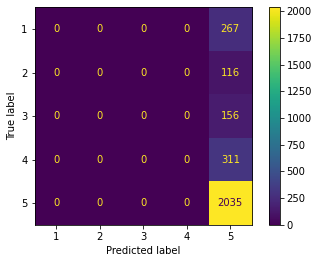

In [ ]:
ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.5835094616110806

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, gcf.predict(X_test))

0.7053726169844021

#### 2. RandomForrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [5, 10, 50, 100, 200, 300, 500, 1000], 
              'max_features': [None], 
              'max_depth': [1,2, 3, 4, 5], 
              'min_samples_split': [2, 5, 10, 20], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True], 
              'n_jobs': [-1], 
              'random_state': [0]}

gcf = RandomizedSearchCV(rf, parameters, n_iter=10, verbose=3, cv=3)
gcf.fit(X_train, y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=5, n_estimators=200, n_jobs=-1, random_state=0;, score=0.718 total time=  11.6s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=5, n_estimators=200, n_jobs=-1, random_state=0;, score=0.720 total time=   9.7s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=5, n_estimators=200, n_jobs=-1, random_state=0;, score=0.727 total time=   9.7s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=1, max_features=None, min_samples_split=10, n_estimators=1000, n_jobs=-1, random_state=0;, score=0.709 total time=  12.2s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=1, max_features=None, min_samples_split=10, n_estimators=1000, n_jobs=-1, random_state=0;, score=0.709 total time=  12.1s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=1, ma

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [None],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         300, 500, 1000],
                                        'n_jobs': [-1], 'random_state': [0]},
                   verbose=3)

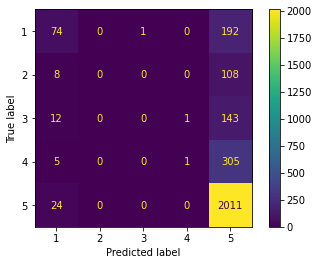

In [ ]:
ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.627592662809557

In [ ]:
accuracy_score(y_test, gcf.predict(X_test))

0.723050259965338

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

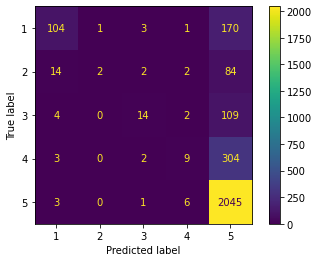

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, xgb.predict(X_test), average = 'weighted')

0.6760765977347556

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

0.7535528596187175

### TFIDF + N-grams

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test, y_train, y_test = train_test_split(df_ng,y, test_size=0.3)

In [ ]:
# from imblearn.over_sampling import SMOTE
# over_sampler = SMOTE()
# X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [ ]:
# X_train,X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size=0.3)

#### 1. SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.get_params()
# svm.fit(X_bal, y_bal)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'random_state': [0]}

gcf = RandomizedSearchCV(svm, parameters, n_iter=10, verbose=3, cv=2)
gcf.fit(X_train, y_train) 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=100, gamma=0.1, kernel=sigmoid, random_state=0;, score=0.708 total time=  11.2s
[CV 2/2] END C=100, gamma=0.1, kernel=sigmoid, random_state=0;, score=0.708 total time=  10.9s
[CV 1/2] END C=1000, gamma=1, kernel=rbf, random_state=0;, score=0.625 total time=  35.8s
[CV 2/2] END C=1000, gamma=1, kernel=rbf, random_state=0;, score=0.631 total time=  44.5s
[CV 1/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.708 total time=  39.3s
[CV 2/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.708 total time=  38.5s
[CV 1/2] END C=100, gamma=0.0001, kernel=rbf, random_state=0;, score=0.657 total time=  40.1s
[CV 2/2] END C=100, gamma=0.0001, kernel=rbf, random_state=0;, score=0.644 total time=  40.0s
[CV 1/2] END C=0.1, gamma=0.001, kernel=sigmoid, random_state=0;, score=0.708 total time=  12.1s
[CV 2/2] END C=0.1, gamma=0.001, kernel=sigmoid, random_state=0;, score=0.708 total time=  11.7s

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid'],
                                        'random_state': [0]},
                   verbose=3)

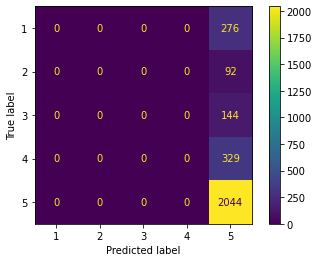

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.5876072464700655

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, gcf.predict(X_test))

0.7084922010398613

#### 2. RandomForrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [5, 10, 50, 100, 200, 300, 500, 1000], 
              'max_features': [None], 
              'max_depth': [1,2, 3, 4, 5], 
              'min_samples_split': [2, 5, 10, 20], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True], 
              'n_jobs': [-1], 
              'random_state': [0]}

gcf = RandomizedSearchCV(rf, parameters, n_iter=10, verbose=3, cv=3)
gcf.fit(X_train, y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=2, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.718 total time=  13.3s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=2, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.708 total time=  13.5s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=2, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.713 total time=  12.1s
[CV 1/3] END bootstrap=True, criterion=entropy, max_depth=4, max_features=None, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=0;, score=0.718 total time=  20.1s
[CV 2/3] END bootstrap=True, criterion=entropy, max_depth=4, max_features=None, min_samples_split=10, n_estimators=200, n_jobs=-1, random_state=0;, score=0.719 total time=  20.2s
[CV 3/3] END bootstrap=True, criterion=entropy, max_dept

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [None],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         300, 500, 1000],
                                        'n_jobs': [-1], 'random_state': [0]},
                   verbose=3)

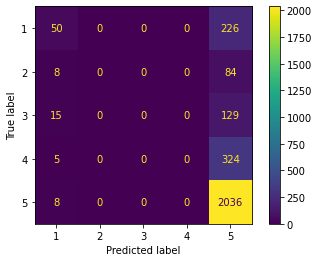

In [ ]:
ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.6221284774406773

In [ ]:
accuracy_score(y_test, gcf.predict(X_test))

0.723050259965338

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

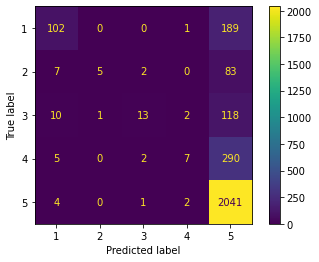

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, xgb.predict(X_test), average = 'weighted')

0.6727210192384018

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

0.751473136915078

### TFIDF + N-grams + POS tagging

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test, y_train, y_test = train_test_split(df_pos,y, test_size=0.3)

In [ ]:
# from imblearn.over_sampling import SMOTE
# over_sampler = SMOTE()
# X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [ ]:
# X_train,X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size=0.3)

#### 1. SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.get_params()
# svm.fit(X_bal, y_bal)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'random_state': [0]}

gcf = RandomizedSearchCV(svm, parameters, n_iter=10, verbose=3, cv=2)
gcf.fit(X_train, y_train) 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=100, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.705 total time=  34.7s
[CV 2/2] END C=100, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.706 total time=  33.7s
[CV 1/2] END C=1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.661 total time= 1.8min
[CV 2/2] END C=1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.655 total time= 1.7min
[CV 1/2] END C=1000, gamma=0.001, kernel=poly, random_state=0;, score=0.705 total time=   0.8s
[CV 2/2] END C=1000, gamma=0.001, kernel=poly, random_state=0;, score=0.706 total time=   0.8s
[CV 1/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.705 total time= 1.7min
[CV 2/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.706 total time= 1.7min
[CV 1/2] END C=10, gamma=0.1, kernel=poly, random_state=0;, score=0.705 total time=   0.8s
[CV 2/2] END C=10, gamma=0.1, kernel=poly, random_state=0;, score=0.706 total time=   0.8s

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid'],
                                        'random_state': [0]},
                   verbose=3)

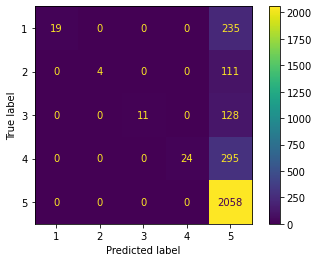

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.6385243395563179

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, gcf.predict(X_test))

0.7334488734835355

#### 2. RandomForrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [5, 10, 50, 100, 200, 300, 500, 1000], 
              'max_features': [None], 
              'max_depth': [1,2, 3, 4, 5], 
              'min_samples_split': [2, 5, 10, 20], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True], 
              'n_jobs': [-1], 
              'random_state': [0]}

gcf = RandomizedSearchCV(rf, parameters, n_iter=10, verbose=3, cv=3)
gcf.fit(X_train, y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=20, n_estimators=1000, n_jobs=-1, random_state=0;, score=0.723 total time= 3.9min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=20, n_estimators=1000, n_jobs=-1, random_state=0;, score=0.724 total time= 4.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=5, max_features=None, min_samples_split=20, n_estimators=1000, n_jobs=-1, random_state=0;, score=0.727 total time= 3.8min
[CV 1/3] END bootstrap=True, criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=0;, score=0.711 total time=  14.0s
[CV 2/3] END bootstrap=True, criterion=entropy, max_depth=2, max_features=None, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=0;, score=0.709 total time=  13.8s
[CV 3/3] END bootstrap=True, criterion=entropy, max_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [None],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         300, 500, 1000],
                                        'n_jobs': [-1], 'random_state': [0]},
                   verbose=3)

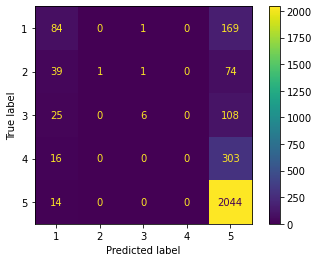

In [ ]:
ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.652011371710891

In [ ]:
accuracy_score(y_test, gcf.predict(X_test))

0.7400346620450606

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

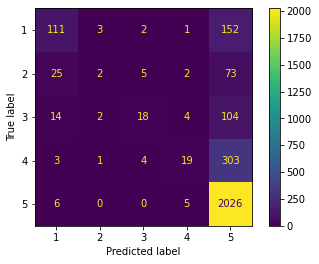

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, xgb.predict(X_test), average = 'weighted')

0.6814230976121806

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

0.7542461005199307

### TFIDF + N-grams + POS tagging + other features

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test, y_train, y_test = train_test_split(df_other,y, test_size=0.3)

In [ ]:
# from imblearn.over_sampling import SMOTE
# over_sampler = SMOTE()
# X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)

In [ ]:
# X_train,X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size=0.3)

#### 1. SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.get_params()
# svm.fit(X_bal, y_bal)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'random_state': [0]}

gcf = RandomizedSearchCV(svm, parameters, n_iter=10, verbose=3, cv=2)
gcf.fit(X_train, y_train) 

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=100, gamma=0.001, kernel=sigmoid, random_state=0;, score=0.705 total time=  14.3s
[CV 2/2] END C=100, gamma=0.001, kernel=sigmoid, random_state=0;, score=0.705 total time=  14.3s
[CV 1/2] END C=10, gamma=1, kernel=rbf, random_state=0;, score=0.720 total time= 1.0min
[CV 2/2] END C=10, gamma=1, kernel=rbf, random_state=0;, score=0.719 total time= 1.0min
[CV 1/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.705 total time=  49.9s
[CV 2/2] END C=0.1, gamma=0.0001, kernel=rbf, random_state=0;, score=0.705 total time=  52.5s
[CV 1/2] END C=100, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.705 total time=  14.4s
[CV 2/2] END C=100, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.705 total time=  14.5s
[CV 1/2] END C=0.1, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.705 total time=  14.2s
[CV 2/2] END C=0.1, gamma=0.0001, kernel=sigmoid, random_state=0;, score=0.705 total ti

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid'],
                                        'random_state': [0]},
                   verbose=3)

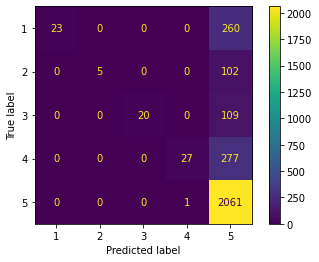

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.6520293786870331

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, gcf.predict(X_test))

0.7403812824956673

#### 2. RandomForrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [5, 10, 50, 100, 200, 300, 500, 1000], 
              'max_features': [None], 
              'max_depth': [1,2, 3, 4, 5], 
              'min_samples_split': [2, 5, 10, 20], 
              'criterion': ['gini', 'entropy'], 
              'bootstrap': [True], 
              'n_jobs': [-1], 
              'random_state': [0]}

gcf = RandomizedSearchCV(rf, parameters, n_iter=10, verbose=3, cv=3)
gcf.fit(X_train, y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.713 total time=  20.8s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.706 total time=  18.7s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=3, max_features=None, min_samples_split=2, n_estimators=300, n_jobs=-1, random_state=0;, score=0.715 total time=  19.0s
[CV 1/3] END bootstrap=True, criterion=entropy, max_depth=4, max_features=None, min_samples_split=5, n_estimators=5, n_jobs=-1, random_state=0;, score=0.705 total time=   0.8s
[CV 2/3] END bootstrap=True, criterion=entropy, max_depth=4, max_features=None, min_samples_split=5, n_estimators=5, n_jobs=-1, random_state=0;, score=0.713 total time=   0.7s
[CV 3/3] END bootstrap=True, criterion=entropy, max_depth=4, m

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [None],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [5, 10, 50, 100, 200,
                                                         300, 500, 1000],
                                        'n_jobs': [-1], 'random_state': [0]},
                   verbose=3)

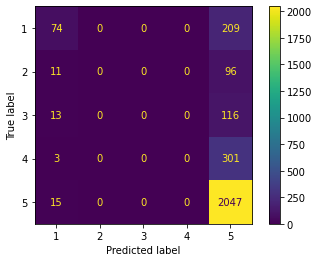

In [ ]:
ConfusionMatrixDisplay.from_estimator(gcf, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, gcf.predict(X_test), average = 'weighted')

0.6420801111923637

In [ ]:
accuracy_score(y_test, gcf.predict(X_test))

0.7351819757365684

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

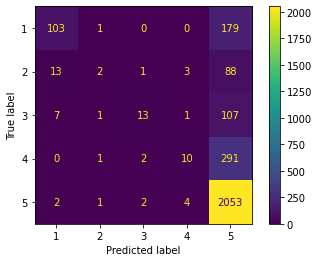

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, xgb.predict(X_test), average = 'weighted')

0.6792452519981348

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

0.7559792027729636

## The best vectorization method and algorithm

The best results occurred to be using TFIDF + N-grams + POS tagging vectorization and with the XGBoost algorithm. The f1 score was 0.68 and the accuracy was 0.75. Those results are not great, taking into account that most of the data is rated at 5 (around 2/3 of the dataset), and our algorithm in highly biased for giving a rating of 5. It can also detect some 1-star ratings, but it is not able to correctly predict any of 2,3, and 4. 